In [1]:
from tensorflow import keras
from keras.models import load_model
import matplotlib.pyplot as plt

## Data preparation

 As the Kaggle entry states, the folder 'dataset2-master' contains 2,500 augmented images with 4 additional subtype labels (JPEG + CSV).

In [2]:
# Make path variable and determine desired image dimensions
# test_path = r'/homes/maschepers/Documents/Cell_data_DeepLearning/dataset2-master/dataset2-master/images/TEST/'
# train_path = r'/homes/maschepers/Documents/Cell_data_DeepLearning/dataset2-master/dataset2-master/images/TRAIN/'

test_path = r'C:\\Users\\Martin Schepers\\Documents\\dataset2-master\\dataset2-master\\images\\TEST\\'
train_path = r'C:\\Users\\Martin Schepers\\Documents\\dataset2-master\\dataset2-master\\images\\TRAIN\\'


train_data = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
train_generator = train_data.flow_from_directory(
    directory=train_path,
    batch_size=20,
    color_mode='rgb',
    target_size=(120, 160),
    class_mode='categorical'
)

test_data = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_generator = test_data.flow_from_directory(
    directory=test_path,
    batch_size=20,
    color_mode='rgb',
    target_size=(120, 160),
    class_mode='categorical'
)

Found 9957 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


In [3]:
for x_train, y_train in train_generator:
    print(x_train.shape, x_train.dtype)
    print(y_train.shape, y_train.dtype)
    break

(20, 120, 160, 3) float32
(20, 4) float32


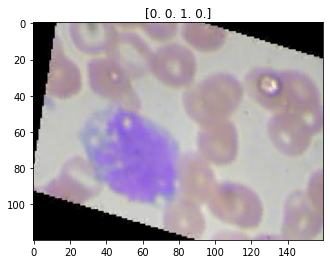

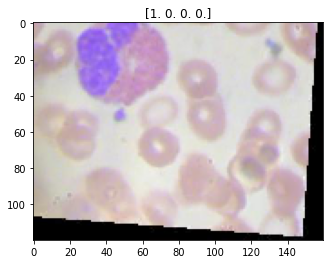

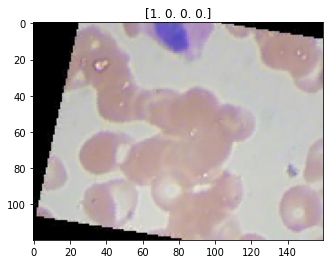

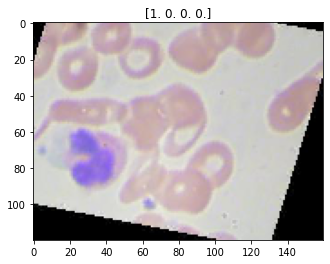

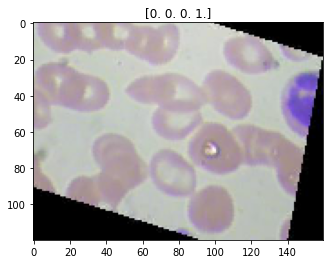

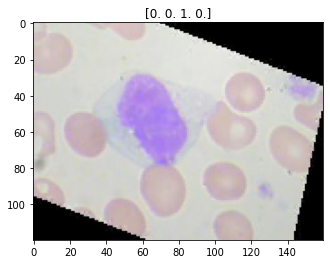

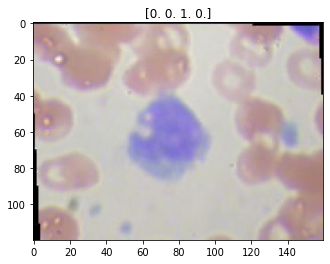

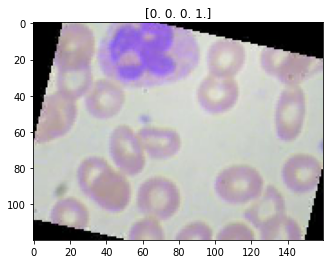

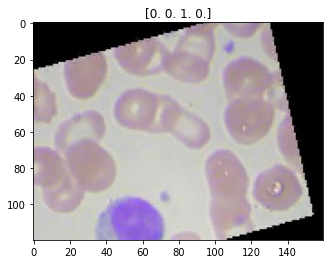

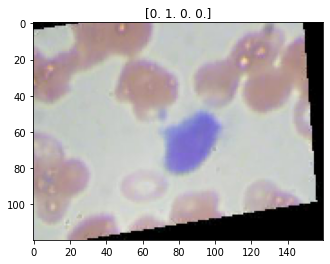

In [4]:
import matplotlib.pyplot as plt
for i in range(0, 10):
    plt.imshow(x_train[i])
    plt.title(str(y_train[i]))
    plt.show()

## Deep learning model creation

In [5]:
#### Change to leaky relu! So far best
#### Perhaps higher dropout?

celclass = keras.models.Sequential()
celclass.add(keras.layers.InputLayer(input_shape=(120, 160, 3)))
# First convolutional layer
celclass.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
celclass.add(keras.layers.MaxPooling2D())
celclass.add(keras.layers.Dropout(0.2))

# Second convolutional layer
celclass.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
celclass.add(keras.layers.MaxPooling2D())
celclass.add(keras.layers.Dropout(0.2))

# Third convolutional layer
celclass.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
celclass.add(keras.layers.MaxPooling2D())

# Fourth convolutional layer (test)
celclass.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
celclass.add(keras.layers.MaxPooling2D())

# Dense layer
celclass.add(keras.layers.Flatten())
celclass.add(keras.layers.Dense(units=64, activation='relu'))
celclass.add(keras.layers.Dropout(0.3))
# Output layer
celclass.add(keras.layers.Dense(units=4, activation='softmax'))

celclass.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 158, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 79, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 59, 79, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 77, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 38, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 28, 38, 64)        0

In [6]:
celclass.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.RMSprop(),
    metrics=keras.metrics.CategoricalAccuracy()
)

# keras.losses.SparseCategoricalCrossentropy()

In [7]:
# history = celclass.fit(train_generator, validation_data=test_generator, epochs=30)

history = celclass.fit_generator(generator=train_generator,
                                 epochs=30,
                                 steps_per_epoch=300,
                                 validation_data=test_generator,
                                 validation_steps=50
                                )

Epoch 1/30


C:\Users\MARTIN~1\AppData\Local\Temp/ipykernel_2572/3281826609.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = celclass.fit_generator(generator=train_generator,


300/300 [==============================] - 67s 221ms/step - loss: 1.4089 - categorical_accuracy: 0.2518 - val_loss: 1.3821 - val_categorical_accuracy: 0.2430
Epoch 2/30
300/300 [==============================] - 68s 225ms/step - loss: 1.2962 - categorical_accuracy: 0.3884 - val_loss: 1.3113 - val_categorical_accuracy: 0.3960
Epoch 3/30
300/300 [==============================] - 70s 233ms/step - loss: 1.0039 - categorical_accuracy: 0.5641 - val_loss: 0.6754 - val_categorical_accuracy: 0.6480
Epoch 4/30
300/300 [==============================] - 69s 229ms/step - loss: 0.7878 - categorical_accuracy: 0.6592 - val_loss: 0.7558 - val_categorical_accuracy: 0.5870
Epoch 5/30
300/300 [==============================] - 67s 223ms/step - loss: 0.6464 - categorical_accuracy: 0.7209 - val_loss: 11.1462 - val_categorical_accuracy: 0.2540
Epoch 6/30
300/300 [==============================] - 66s 219ms/step - loss: 0.5834 - categorical_accuracy: 0.7608 - val_loss: 0.5389 - val_categorical_accuracy: 0.7

In [8]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

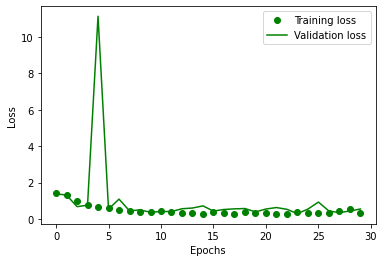

In [9]:
plt.plot(history.history['loss'], 'go', label='Training loss')
plt.plot(history.history['val_loss'], 'g-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

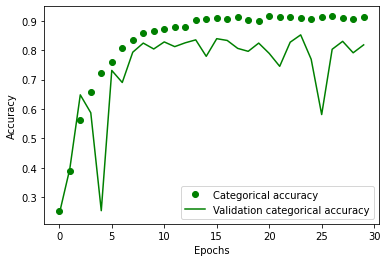

In [10]:
plt.plot(history.history['categorical_accuracy'], 'go', label='Categorical accuracy')
plt.plot(history.history['val_categorical_accuracy'], 'g-', label='Validation categorical accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Observations

Using Adam, the model kept stagnating at loss 1.38 and it woudn't get better then random guessing (25% accuracy). Changing to RMSprop caused the model to immediately perform very well, using 2 dropout layers after the convolutional layers and one after the dense layer caused the model to easily make it to about 80% accuracy before starting to overfit.

Trying to apply additional regularizers such as L1L2 and batch normalization quickly caused the model to perform poorly or severely start overfit at the first 10 epochs.

In [12]:
# filepath = "weights_2022-06-22_test5_leakyrelu.h5"

# celclass.save(
#     filepath,
#     overwrite=True,
#     include_optimizer=True,
#     save_format=None,
#     signatures=None,
#     options=None,
#     save_traces=True,
# )
# # save_model_weights_hdf5(celclass, filepath, overwrite = TRUE)